# Machine Learning | Project 1 | 2021/22

- João Santos, 76912
- João Carvalho, 106310

[Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

Useful code:
- https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
- https://www.kaggle.com/code/mushfirat/stroke-dataset-eda-model-comparison

## Model Implementation

## Imports and Data Load

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline

In [14]:
def load_data():
    data = pd.read_csv('healthcare-dataset-stroke-data.csv')
    data = data.drop('id', axis=1)
    categorical = [ 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    numerical = ['avg_glucose_level', 'bmi','age']
    y= data['stroke']
    X = data.drop('stroke', axis=1)
    return X, y, categorical, numerical

In [15]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [16]:
def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))    
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

(5110, 10) (5110,)
>LR 0.839 (0.029)
>LDA 0.833 (0.030)
>SVM 0.649 (0.063)


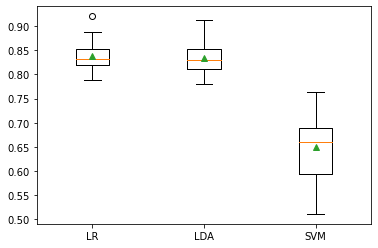

In [17]:
X,y,categorical, numerical= load_data()
print(X.shape, y.shape)

models, names = get_models()
results = list()

for i in range(len(models)):
    transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
    pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', models[i])])    
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()